# Fundamentos de Análise de Dados 2022.1

# Dataset

_Naval Propulsion Plants_: regressão múltipla (2 variáveis de saída), estimar cada variável de saída separadamente:
- 11934 amostras;
- 16 características reais;
- 2 características reais para estimar, mas estimar somente _GT Compressor decay state coecient_ (remover _GT Turbine decay state coecient_).

# 01. Fazer o _download_ do respectivo banco de dados.

Link: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants

Após feito o download, os dados foram salvos em _"../data/naval_data.txt"_.

# 02. Fazer a leitura dos dados.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
column_names = [
    "Lever position",
    "Ship speed",
    "Gas Turbine shaft torque",
    "GT rate of revolutions",
    "Gas Generator rate of revolutions",
    "Starboard Propeller Torque",
    "Port Propeller Torque",
    "Hight Pressure Turbine exit temperature",
    "GT Compressor inlet air temperature",
    "GT Compressor outlet air temperature",
    "HP Turbine exit pressure",
    "GT Compressor inlet air pressure",
    "GT Compressor outlet air pressure",
    "GT exhaust gas pressure",
    "Turbine Injecton Control",
    "Fuel flow",
    "GT Compressor decay state coefficient",
    "GT Turbine decay state coefficient"
]

In [3]:
# read data using read_csv
# raw_data = pd.read_csv("data/naval_data.txt", sep="   ", header=None, engine='python')

# read data using read_fwf
raw_data = pd.read_fwf("../data/naval_data.txt", header=None)
raw_data.columns = column_names

In [4]:
raw_data.head()

,Lever position,Ship speed,Gas Turbine shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [8]:
# convert the DataFrame into a Numpy array
naval_array = raw_data.to_numpy()
naval_array

array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 8.2000000e-02,
        9.5000000e-01, 9.7500000e-01],
       [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 2.8700000e-01,
        9.5000000e-01, 9.7500000e-01],
       [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 2.5900000e-01,
        9.5000000e-01, 9.7500000e-01],
       ...,
       [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 8.3400000e-01,
        1.0000000e+00, 1.0000000e+00],
       [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.1490000e+00,
        1.0000000e+00, 1.0000000e+00],
       [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.7040000e+00,
        1.0000000e+00, 1.0000000e+00]])

# 03. Se necessário, dividir os dados em conjunto de treinamento (70%) e teste (30%), utilizando a função apropriada do scikit-learn. Quatro NumPy arrays devem ser criados: X_train, y_train, X_test e y_test.

In [9]:
data = raw_data.copy()

X = data.drop(["GT Compressor decay state coefficient",
               "GT Turbine decay state coefficient"],
              axis=1)

y = data[["GT Compressor decay state coefficient"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [11]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# 04. Acrescentar uma coluna de 1s ([1 1 . . . 1]^T) como última coluna da matriz de treinamento Xtrain (vamos chamá-la de X_train_2). Repita o procedimento para a matriz de teste, chamando-a de X_test_2.

[StackOverflow: How to add an extra column to a NumPy array](https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array)

In [12]:
X_train.shape

(8353, 16)

In [13]:
X_train_2 = np.c_[X_train, np.ones(8353)]
X_train_2

array([[1.1380000e+00, 3.0000000e+00, 3.2824350e+03, ..., 3.2952000e+01,
        2.2300000e-01, 1.0000000e+00],
       [1.1380000e+00, 3.0000000e+00, 1.1174930e+03, ..., 0.0000000e+00,
        8.8000000e-02, 1.0000000e+00],
       [5.1400000e+00, 1.5000000e+01, 2.1622291e+04, ..., 2.4760000e+01,
        4.9000000e-01, 1.0000000e+00],
       ...,
       [5.1400000e+00, 1.5000000e+01, 2.1632784e+04, ..., 2.5752000e+01,
        5.1000000e-01, 1.0000000e+00],
       [4.1610000e+00, 1.2000000e+01, 1.4717766e+04, ..., 1.7318000e+01,
        3.4300000e-01, 1.0000000e+00],
       [1.1380000e+00, 3.0000000e+00, 4.8720200e+03, ..., 0.0000000e+00,
        2.1600000e-01, 1.0000000e+00]])

In [14]:
X_test.shape

(3581, 16)

In [15]:
X_test_2 = np.c_[X_test, np.ones(3581)]
X_test_2

array([[8.2060000e+00, 2.4000000e+01, 5.0993295e+04, ..., 5.8804000e+01,
        1.1640000e+00, 1.0000000e+00],
       [7.1480000e+00, 2.1000000e+01, 3.8998174e+04, ..., 4.3301000e+01,
        8.5700000e-01, 1.0000000e+00],
       [4.1610000e+00, 1.2000000e+01, 1.4721227e+04, ..., 1.6673000e+01,
        3.3000000e-01, 1.0000000e+00],
       ...,
       [2.0880000e+00, 6.0000000e+00, 4.6389390e+03, ..., 2.3683000e+01,
        2.2200000e-01, 1.0000000e+00],
       [8.2060000e+00, 2.4000000e+01, 5.0992731e+04, ..., 5.8350000e+01,
        1.1550000e+00, 1.0000000e+00],
       [1.1380000e+00, 3.0000000e+00, 5.0947110e+03, ..., 1.2657000e+01,
        2.4200000e-01, 1.0000000e+00]])

# 05. Calcular o posto das matrizes X_train_2 e X_test_2. Se necessário, ajustar as matrizes X_train_2 e X_test_2.

In [16]:
np.linalg.matrix_rank(X_train_2)

14

In [17]:
np.linalg.matrix_rank(X_test_2)

14

# 06. Calcular a decomposição QR da matriz de treinamento: X_train_2 = QR, usando a função do NumPy apropriada.

In [20]:
Q, R = np.linalg.qr(X_train_2)

# 07. Calcular o vetor de coeficientes $\tilde{x}$  da Equação (1), utilizando a função do NumPy linalg.solve.

## Regressão: O Método dos Mínimos Quadrados

O Método dos Mínimos Quadrados consiste em encontrar uma solução aproximada, $\tilde{x}$ , de um sistema linear inconsistente

$Ax = b$.

Isso é feito projetando o vetor b no espaço-nulo esquerdo de A e resolvendo as equações normais

$A^TA\tilde{x} = A^Tb$.

Pode-se substituir A por sua decomposição QR, A = QR, e obter novas equações normais:

$R\tilde{x} = Q^Tb$, (1)

sob determinadas condições em A.

In [23]:
coefs_lineares = np.linalg.solve(R, np.dot(Q.T, y_train))

In [24]:
coefs_linearees

array([[ 2.67682906e-01],
       [-7.88151443e-02],
       [-4.03124491e-07],
       [-2.98748286e-05],
       [ 3.08754076e-05],
       [ 1.32351053e+10],
       [-1.32351053e+10],
       [-3.91311270e-07],
       [-7.20849138e+08],
       [-3.39886794e-03],
       [ 1.88947964e-01],
       [ 3.82084616e+11],
       [ 1.42843121e-02],
       [ 6.92114916e-01],
       [-7.43840421e-04],
       [ 2.19256251e-01],
       [-1.73715895e+11]])

In [49]:
data.drop(["GT Compressor decay state coefficient"],
              axis=1).T[np.abs(np.diag(R))<1e-11]

,0,1,2,3,4,5,6,7,8,9,...,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933
Port Propeller Torque,7.584,28.204,60.358,113.774,175.306,246.278,332.077,437.989,644.905,7.915,...,644.843,10.692,22.478,60.319,113.743,175.239,245.954,332.389,438.024,644.880
GT Compressor inlet air pressure,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,...,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998,0.998
GT Turbine decay state coefficient,0.975,0.975,0.975,0.975,0.975,0.975,0.975,0.975,0.975,0.976,...,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [33]:
np.diag(R)

array([-5.27742499e+02,  1.35251378e+01,  8.07633347e+05,  2.10511679e+04,
       -2.90039187e+04, -7.01047938e+02, -1.33773389e-13, -1.55975973e+03,
        5.09816070e+02,  1.89349952e+02,  1.15595897e+00, -1.36202346e-13,
        6.49286244e+00,  2.72139430e-02, -4.00398290e+02, -4.35835759e-01,
       -1.28249867e-13])

In [43]:
X_train_2.shape

(8353, 17)

In [52]:
np.allclose(X_train_2, np.dot(q, r))

True

<AxesSubplot:>

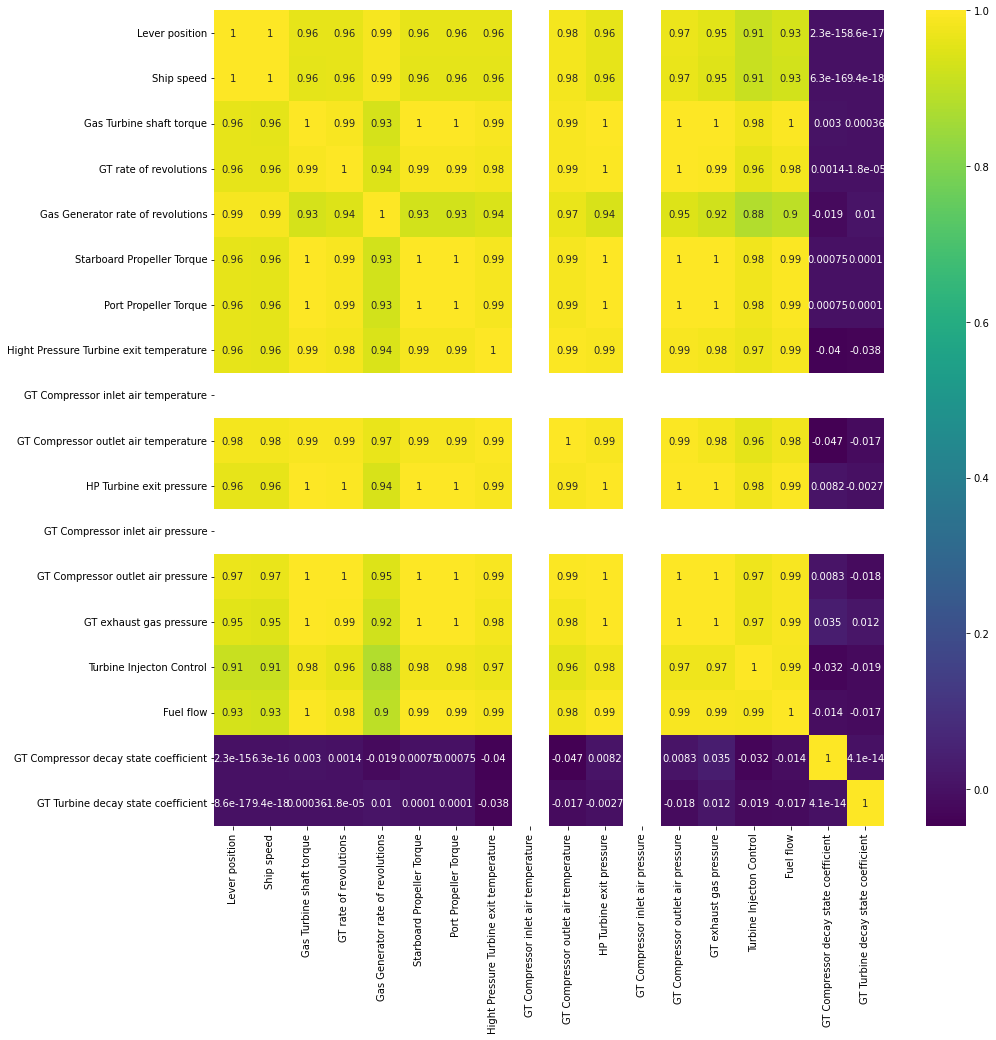

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]